# 学习曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size = 100)

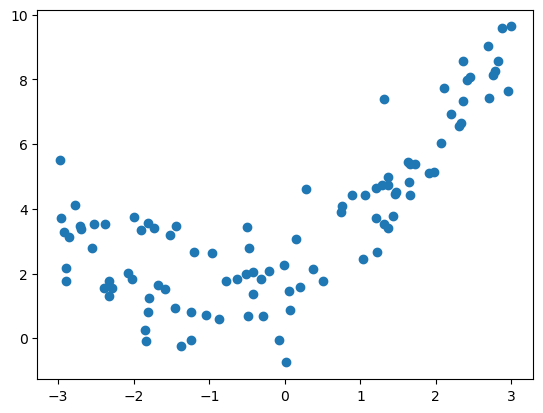

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [5]:
X_train.shape # 默认的情况下，取25%的元素作为测试数据。

(75, 1)

### 如何绘制学习曲线？
1. 初始化一些数据
2. 训练模型
3. 测试模型
4. 增加一些数据
5. 重复步骤2 3 4

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# 用于记录每一次模型的成绩
train_score = []
test_score = []
for i in range(1, 76): # 意味着，从只给1个数据训练，到给75个训练数据
    # 每一次，都训练一个新的模型
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    # 基于测试数据集训练的结果
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    #基于测试数据集训练的结果
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

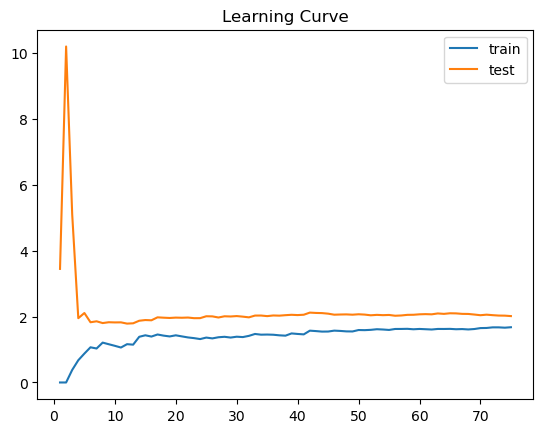

In [7]:
plt.title("Learning Curve")
plt.plot([i for i in range(1, 76)],  # X_train Size
         np.sqrt(train_score),  # MSE -> RMSE
         label="train")

plt.plot([i for i in range(1, 76)], # X_train Size
         np.sqrt(test_score), # MSE -> RMSE
         label="test")

plt.legend()
plt.show()

### 怎么解读这张图？
1. 对于训练数据集(train curve)来说：
    * 有着递增的趋势，因为随着训练数据的增加，数据点越多，越难拟合所有的数据点，所以误差就累积的越来越多
    * 但是在刚开始的阶段，误差累积的很快，到了一定程度以后误差累积越来越慢，相应比较稳定
2. 对于测试数据集(test curve)来说：
    * 是一个下滑的曲线，使用非常少的训练数据的时候，误差很大，随着训练数据的增加，误差减小
    * 最开始的时候减小的很快，样本多到一定程度的时候，测试的误差减小的也不会太多，达到相对稳定
    
3. 最终，测试误差和训练误差趋于一个级别。但是测试误差高于训练误差，也好理解，毕竟在学习过的数据集上的表现更好。

In [8]:
# 为了对比其他的模型，将上述过程提炼成一个函数
def plot_learning_curve(algo, X_train: np.ndarray, X_test: np.ndarray, 
                        y_train: np.ndarray, y_test: np.ndarray, y_axis=[0, 4],
                       title="Learning Curve", save=False, save_dpi=300, save_fmt="png"):
    
    test_score, train_score = [], []
    
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        
        # 基于测试数据集训练的结果
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        #基于测试数据集训练的结果
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    plt.title(title)
    plt.plot([i for i in range(1, len(X_train)+1)],  # X_train Size
             np.sqrt(train_score),  # MSE -> RMSE
             label="train")

    plt.plot([i for i in range(1, len(X_train)+1)], # X_train Size
             np.sqrt(test_score), # MSE -> RMSE
             label="test")
    plt.axis([0, len(X_train)+1] + y_axis)
    plt.legend()
    if save:
        plt.savefig(f"{title}.{save_fmt}", dpi=save_dpi)
    else:
        plt.show()

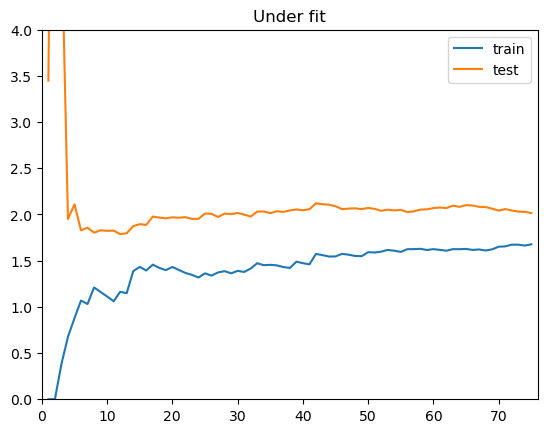

In [9]:
plot_learning_curve(LinearRegression(), X_train, X_test,y_train, y_test, title="Under fit")

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
def PolynomialRegression(degree):
    return Pipeline([
        ("Poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

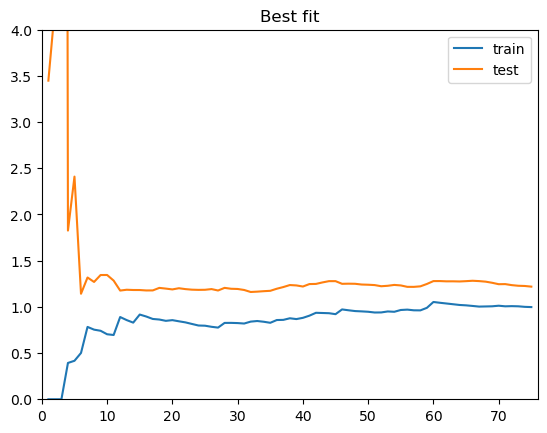

In [11]:
plot_learning_curve(PolynomialRegression(2), X_train, X_test,y_train, y_test, title="Best fit")

### 观察：
* 对于线性回归来说，最终曲线稳定在1.7左右
* 对于degree=2的多项式回归来说，最终稳定在1.0或者0.9左右
多项式回归稳定的位置比线性回归稳定的位置低，所以这里多项式回归完胜

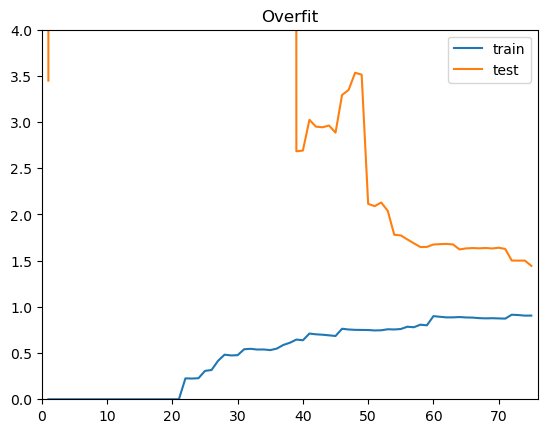

In [12]:
plot_learning_curve(PolynomialRegression(20), X_train, X_test,y_train, y_test, title="Overfit")

### 观察
* 训练数据集的误差逐渐上升
* 测试数据集的误差逐渐下降
* 稳定的时候，train，test的间距依然比较大：
    * 这就意味着，在训练数据集上拟合的不错，但是测试数据集上不行
    * 这就是过拟合了
    
->回到理论